# 5. Modelling - Count Vectorization

In [1]:
# import packages
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

In [2]:
# load data files
X_counts_df = pd.read_csv('../data/counts_df.csv')

In [3]:
data = pd.read_csv("../data/processed_data.csv")

In [4]:
X_counts_df.head()

,Unnamed: 0,0,00,000,00000,00000000000000000001664,00000000000001,000000001,000000002,000000026,...,zzillow,¼,ängöl,ѕcнool,علي,مصطفى,ندا,يوسف,⅓,ツ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.head()

,subreddit,title+selftext
0,stocks,Advise on Long Term Stock? I am earning very l...
1,stocks,Dad told me to sell on Monday when the market ...
2,stocks,Merger/accusation question about a game co. An...
3,stocks,Best Software to Track Trades and Create Repor...
4,stocks,"After Driving My Friends Tesla, Here Are My Th..."


In [6]:
data.tail()

,subreddit,title+selftext
3395,CryptoCurrency,"“Bull Markets Can Make You Money, Bear Markets..."
3396,CryptoCurrency,What made you get into crypto? Let me get star...
3397,CryptoCurrency,How to introduce crypto to the people who have...
3398,CryptoCurrency,Mining crypto I'm curious as to how mining and...
3399,CryptoCurrency,Buying Crypto with Reward Points or Gift Cards...


In [7]:
# convert posts in 'stocks' to 1 and 'CryptoCurrency' to 0.
di = {'stocks':1, 'CryptoCurrency':0}
data['subreddit'] = data['subreddit'].map(di)   

In [8]:
data.shape

(3400, 2)

In [9]:
# assign X and y dataset
X = X_counts_df
y = data['subreddit']

In [10]:
y.shape

(3400,)

In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: subreddit, dtype: int64

In [12]:
y.tail()

3395    0
3396    0
3397    0
3398    0
3399    0
Name: subreddit, dtype: int64

## Standardize the Data

Standard scaling is not performed for the dataset as the sparse matrix only contains binary values.

## Train/test split

In [13]:
# train/test split the dataset with 70/30 split and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

## Naive Bayes Modelling

### Using Bernoulli Naive Bayes to predict subreddit classification

In [14]:
# fit data to Bernoulli Naive Bayes Model
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

# predict subreddit classifcation
y_pred = BernNB.predict(X_test)

# Cross-Validation
print(cross_val_score(BernNB, X_train, y_train, cv=5).mean())

# Accuracy score for train dataset
print(BernNB.score(X_train, y_train))

# Accuracy score for test dataset
print(BernNB.score(X_test,y_test))

# print accuracy score for y_test and y_pred
print(accuracy_score(y_test, y_pred))

BernoulliNB(binarize=True)
0.7142857142857143
0.7617647058823529
0.7205882352941176
0.7205882352941176


### Using Multinomial Naive Bayes to predict subreddit classification

In [15]:
# fit data to Multinomial Naive Bayes Model
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

# predict subreddit classifcation
y_pred = MultiNB.predict(X_test)

# Cross-Validation
print(cross_val_score(MultiNB, X_train, y_train, cv=5).mean())

# Accuracy score for train dataset
print(MultiNB.score(X_train, y_train))

# Accuracy score for test dataset
print(MultiNB.score(X_test, y_test))

# print accuracy score for y_test and y_pred
print(accuracy_score(y_test, y_pred))

MultinomialNB()
0.9298319327731093
0.9651260504201681
0.9303921568627451
0.9303921568627451


### Using Gaussian Naive Bayes to predict subreddit classification

In [16]:
# fit data to Gaussian Naive Bayes Model
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

# predict subreddit classifcation
y_pred = GausNB.predict(X_test)

# Cross-Validation
print(cross_val_score(GausNB, X_train, y_train, cv=5).mean())

# Accuracy score for train dataset
print(GausNB.score(X_train, y_train))

# Accuracy score for test dataset
print(GausNB.score(X_test, y_test))

# print accuracy score for y_test and y_pred
print(accuracy_score(y_test, y_pred))

GaussianNB()
0.8159663865546218
0.9739495798319328
0.803921568627451
0.803921568627451


## Select the best performing Naive Bayes Model

| Classification Model | Train Accuracy | Test Accuracy | Score Difference |
| :----:| :-------:| :-----:| :-----:|
|Bernoulli NB|0.762 |0.721 |0.041|
|Multinomial NB|0.965 |0.930 |0.035|
|Gaussian NB|0.974 |0.804 |0.170|

From the table, Multinomial Naive Bayes has the best train and test accuracy scores at 0.965 and 0.930. In addition, the score difference between train and test is 0.035. This implies that the model generalizes well to predicting the test data. Therefore, further analysis will be done to examine the model performance. 

### Multinomial Naive Bayes 

In [17]:
# fit data to Multinomial Naive Bayes Model
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

# predict subreddit classifcation
y_pred = MultiNB.predict(X_test)

MultinomialNB()


In [18]:
# generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       510
           1       0.99      0.87      0.93       510

    accuracy                           0.93      1020
   macro avg       0.94      0.93      0.93      1020
weighted avg       0.94      0.93      0.93      1020



In [19]:
# generate cconfusion matrix
cm = confusion_matrix(y_test,y_pred)

# calculate accuracy, precision, recall(sensitivity) and specificity
tn, fp, fn, tp = cm.ravel()

acc_score = accuracy_score(y_test, y_pred)        # true predictions / total predictions
prec_score = precision_score(y_test, y_pred)      # true positives / (true positives + false positives)
rec_score = recall_score(y_test, y_pred)          # true positives / (true positives + false negatives)
spec_score = tn / (tn+fp)                         # true negative rate

print("accuracy score : " + str(acc_score))
print("precision score : " + str(prec_score))
print("recall score : " + str(rec_score))
print("specificity score : " + str(spec_score))

accuracy score : 0.9303921568627451
precision score : 0.9866962305986696
recall score : 0.8725490196078431
specificity score : 0.9882352941176471


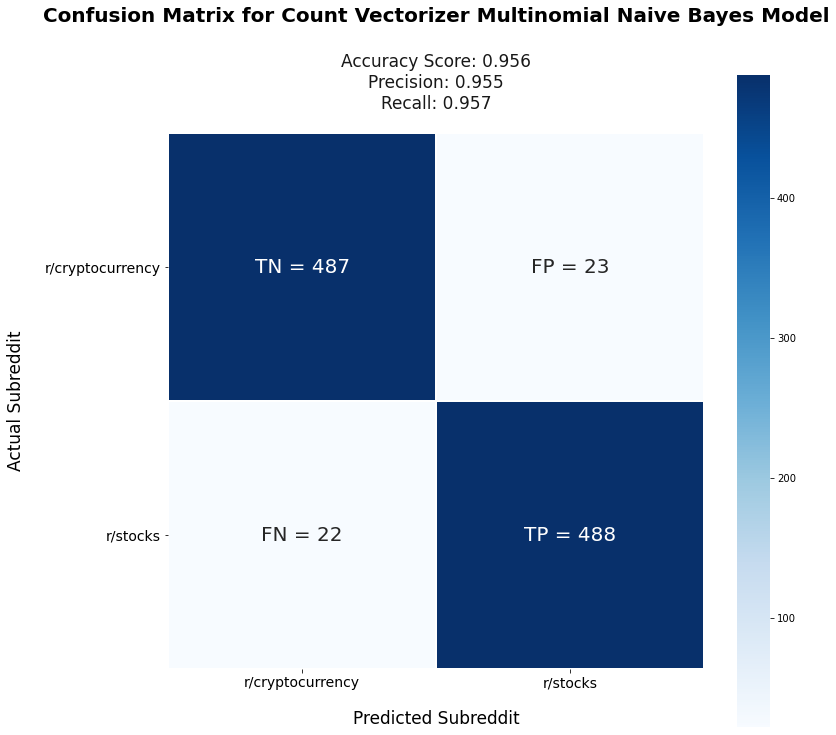

In [28]:
# create modified labels for confusion matrix
modified_cm = []

for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   

# plot confusion matrix
plt.figure(figsize=(12,12))
ax = sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size":20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['r/cryptocurrency','r/stocks'],
            yticklabels = ['r/cryptocurrency','r/stocks']);

# set x and y labels
plt.xlabel('Predicted Subreddit', labelpad=20, fontsize = 17);
plt.ylabel('Actual Subreddit', labelpad=20, fontsize = 17);

#set tick labels
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14, rotation = 0)

#set title and subtitle 
ax.text(x=0.5, y=1.2, s='Confusion Matrix for Count Vectorizer Multinomial Naive Bayes Model', 
        fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.0, s='Accuracy Score: {:.3f}'.format(acc_score) + '\n' 
         + 'Precision: {:.3f}'.format(prec_score) + '\n'
         + 'Recall: {:.3f}'.format(rec_score) + '\n', 
        fontsize=17, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes);

From the classification report, the accuracy score of the Multinomial Naive Bayes model is 0.930. This means that it classifies 93% of the posts in the correct subreddits. 

From the confusion matrix, we can see that 445 posts from r/stocks and 504 posts from r/cryptocurrency were correctly classified.

## Logistic Regression Modelling

### Logistic Regression

In [21]:
# instantiate the model
lr = LogisticRegression()

In [22]:
# fit and train the model
lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
# predict subreddit classifcation
y_pred = lr.predict(X_test)

In [24]:
# Cross-Validation
print(cross_val_score(lr, X_train, y_train, cv=5).mean())

# Accuracy score for train dataset
print(lr.score(X_train, y_train))

# Accuracy score for test dataset
print(lr.score(X_test, y_test))

# print accuracy score for y_test and y_pred
print(accuracy_score(y_test, y_pred))

0.9525210084033613
1.0
0.9558823529411765
0.9558823529411765


In [25]:
# generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       510
           1       0.95      0.96      0.96       510

    accuracy                           0.96      1020
   macro avg       0.96      0.96      0.96      1020
weighted avg       0.96      0.96      0.96      1020



In [26]:
# generate confusion matrix
cm = confusion_matrix(y_test,y_pred)

# calculate accuracy, precision, recall(sensitivity) and specificity
tn, fp, fn, tp = cm.ravel()

acc_score = accuracy_score(y_test, y_pred)        # true predictions / total predictions
prec_score = precision_score(y_test, y_pred)      # true positives / (true positives + false positives)
rec_score = recall_score(y_test, y_pred)          # true positives / (true positives + false negatives)
spec_score = tn / (tn+fp)                         # true negative rate

print("accuracy score : " + str(acc_score))
print("precision score : " + str(prec_score))
print("recall score : " + str(rec_score))
print("specificity score : " + str(spec_score))

accuracy score : 0.9558823529411765
precision score : 0.9549902152641878
recall score : 0.9568627450980393
specificity score : 0.9549019607843138


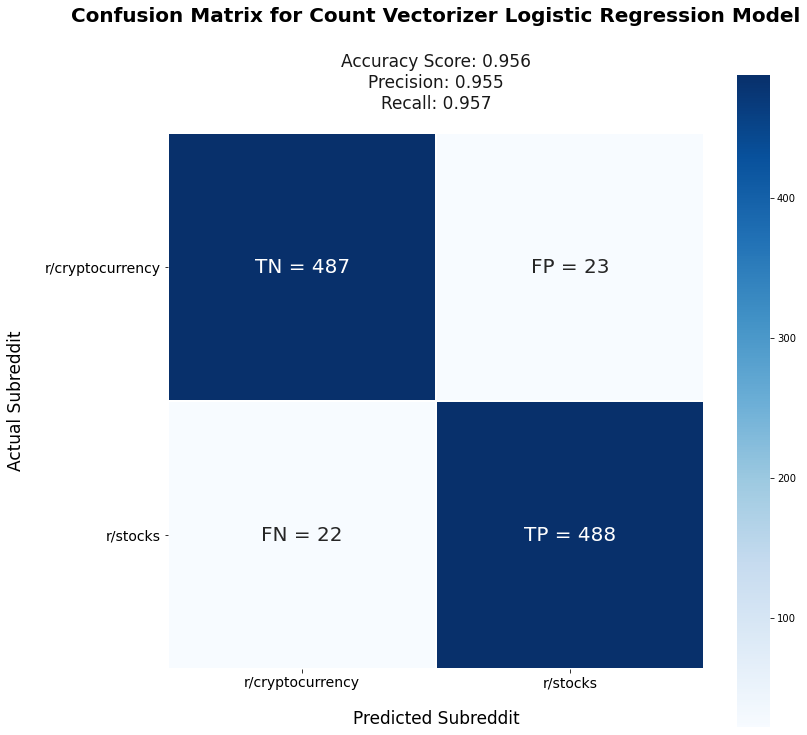

In [29]:
# create modified labels for confusion matrix
modified_cm = []

for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   

# plot confusion matrix
plt.figure(figsize=(12,12))
ax = sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size":20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['r/cryptocurrency','r/stocks'],
            yticklabels = ['r/cryptocurrency','r/stocks']);

# set x and y labels
plt.xlabel('Predicted Subreddit', labelpad=20, fontsize = 17);
plt.ylabel('Actual Subreddit', labelpad=20, fontsize = 17);

#set tick labels
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14, rotation = 0)

#set title and subtitle 
ax.text(x=0.5, y=1.2, s='Confusion Matrix for Count Vectorizer Logistic Regression Model', 
        fontsize=20, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.0, s='Accuracy Score: {:.3f}'.format(acc_score) + '\n' 
         + 'Precision: {:.3f}'.format(prec_score) + '\n'
         + 'Recall: {:.3f}'.format(rec_score) + '\n', 
        fontsize=17, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes);

From the classification report, the accuracy score of the Multinomial Naive Bayes model is 0.956. This means that it classifies 95.6% of the posts in the correct subreddits. 

From the confusion matrix, we can see that 488 posts from r/stocks and 487 posts from r/cryptocurrency were correctly classified.